# No tax

In [1]:
import pandas as pd
import numpy as np

# import os
# import sys
# module_path = os.path.abspath(os.path.join('..'))
# print(module_path)
# sys.path.append(module_path)
import model.parts.utils as utils
from model.sys_params import *
from model.sim_setup import SIMULATION_TIME_STEPS
# df = pd.read_pickle(r'experiment.p')

# Read in no tax experiment frozen to show A/B
df = pd.read_pickle(r'experiment_no_tax.p')

stakeDelegateds: 605 events
stakeDelegatedLockeds: 375 events
stakeDelegatedWithdrawns: 326 events
allocationCloseds: 47 events
allocationCollecteds: 16 events
stakeDepositeds: 25 events
rewardsAssigneds: 47 events
delegationParametersUpdateds: 6 events
allocationCreateds: 51 events
TOTAL NUMBER OF EVENTS: 1529
You should set SIMULATION_TIME_STEPS in config.py to a minimum of 1529 to capture all events.

running file: sim_setup.py
end of file: sim_setup.py


In [2]:
df.reset_index(inplace = True)
pd.set_option('display.max_rows', None)

In [3]:
df.head()

,index,indexers,delegator_portfolios,block_number,epoch,injected_event_shift,simulation,subset,run,substep,timestep
0,6,{'0x7ab4cf25330ed7277ac7ab59380b68eea68abb0e':...,{},11474009,4,0,0,0,1,6,1
1,12,{'0x7ab4cf25330ed7277ac7ab59380b68eea68abb0e':...,{},11474009,4,0,0,0,1,6,2
2,18,{'0x7ab4cf25330ed7277ac7ab59380b68eea68abb0e':...,{},11474307,4,0,0,0,1,6,3
3,24,{'0x7ab4cf25330ed7277ac7ab59380b68eea68abb0e':...,{'0xd776a7306ee6a060cebb46b46d305e88fd39ba84':...,11474332,4,0,0,0,1,6,4
4,30,{'0x7ab4cf25330ed7277ac7ab59380b68eea68abb0e':...,{'0xd776a7306ee6a060cebb46b46d305e88fd39ba84':...,11474426,4,0,0,0,1,6,5


In [4]:
for i in df.indexers:
    print(i['0x7ab4cf25330ed7277ac7ab59380b68eea68abb0e'].delegators[1])

self.id=1, self.shares=0, self.holdings=Decimal('10000000000'), self.undelegated_tokens=0
self.id=1, self.shares=0, self.holdings=Decimal('10000000000'), self.undelegated_tokens=0
self.id=1, self.shares=0, self.holdings=Decimal('10000000000'), self.undelegated_tokens=0
self.id=1, self.shares=0, self.holdings=Decimal('10000000000'), self.undelegated_tokens=0
self.id=1, self.shares=0, self.holdings=Decimal('10000000000'), self.undelegated_tokens=0
self.id=1, self.shares=0, self.holdings=Decimal('10000000000'), self.undelegated_tokens=0
self.id=1, self.shares=0, self.holdings=Decimal('10000000000'), self.undelegated_tokens=0
self.id=1, self.shares=0, self.holdings=Decimal('10000000000'), self.undelegated_tokens=0
self.id=1, self.shares=0, self.holdings=Decimal('10000000000'), self.undelegated_tokens=0
self.id=1, self.shares=0, self.holdings=Decimal('10000000000'), self.undelegated_tokens=0
self.id=1, self.shares=0, self.holdings=Decimal('10000000000'), self.undelegated_tokens=0
self.id=1,

In [5]:
from model.parts.portfolio import Portfolio
portfolios = df['delegator_portfolios']
portfolio_values = {}
timestep = 0
for i in portfolios:
    for delegator_id, values in i.items():
        if delegator_id not in portfolio_values:
            portfolio_values[delegator_id] = {}
        portfolio_values[delegator_id][timestep] = values
    timestep += 1
delegator_values_df = pd.DataFrame(portfolio_values)
for i in delegator_values_df.columns:
    delegator_values_df[i] = [Portfolio(i) if j != j else j for j in delegator_values_df[i]]
delegator_values_df.head()

,0xd776a7306ee6a060cebb46b46d305e88fd39ba84,1
3,<class 'model.parts.portfolio.Portfolio'>: {'i...,<class 'model.parts.portfolio.Portfolio'>: {'i...
4,<class 'model.parts.portfolio.Portfolio'>: {'i...,<class 'model.parts.portfolio.Portfolio'>: {'i...
5,<class 'model.parts.portfolio.Portfolio'>: {'i...,<class 'model.parts.portfolio.Portfolio'>: {'i...
6,<class 'model.parts.portfolio.Portfolio'>: {'i...,<class 'model.parts.portfolio.Portfolio'>: {'i...
7,<class 'model.parts.portfolio.Portfolio'>: {'i...,<class 'model.parts.portfolio.Portfolio'>: {'i...


<class 'model.parts.portfolio.Portfolio'>: {'id': 1, 'holdings': Decimal('10000000000'), 'eth_holdings': Decimal('10000'), 'gas_spent': Decimal('0'), 'ROI': Decimal('0'), 'ROI_time': Decimal('0'), 'indexer_shares': {}, 'indexer_revenues': {}, 'indexer_price': {}, 'indexer_realized_price': {}, 'indexer_in_tokens': {}, 'indexer_locked_tokens': {}, 'delegate_block_number': {}, 'withdraw_block_number': {}, 'indexer_ROI': {}, 'indexer_ROI_time': {}}
<class 'model.parts.portfolio.Portfolio'>: {'id': 1, 'holdings': Decimal('10000000000'), 'eth_holdings': Decimal('10000'), 'gas_spent': Decimal('0'), 'ROI': Decimal('0'), 'ROI_time': Decimal('0'), 'indexer_shares': {}, 'indexer_revenues': {}, 'indexer_price': {}, 'indexer_realized_price': {}, 'indexer_in_tokens': {}, 'indexer_locked_tokens': {}, 'delegate_block_number': {}, 'withdraw_block_number': {}, 'indexer_ROI': {}, 'indexer_ROI_time': {}}
<class 'model.parts.portfolio.Portfolio'>: {'id': 1, 'holdings': Decimal('10000000000'), 'eth_holdings

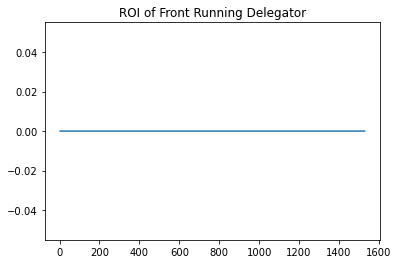

In [6]:
import matplotlib.pyplot as plt
ROI_list = []
for i, values in delegator_values_df[1].items():
    print(values)
    ROI_list.append(values.ROI)
plt.plot(delegator_values_df.index, ROI_list)
plt.title('ROI of Front Running Delegator');

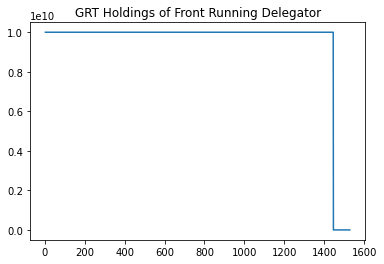

In [7]:
holdings_list = []
for i, values in delegator_values_df[1].items():
    holdings_list.append(values.holdings)
plt.plot(delegator_values_df.index, holdings_list)
plt.title('GRT Holdings of Front Running Delegator');
#plt.ylim(0, 1100000000);

Here we see the front runner delegates all their tokens to the indexer.

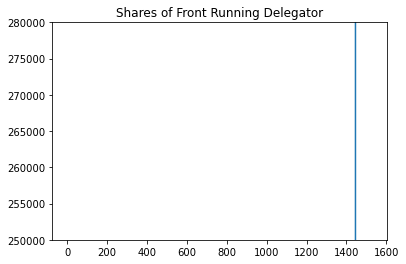

In [8]:
shares_list = []
for i, values in delegator_values_df[1].items():
    if values.indexer_shares != {}:
        shares_list.append(values.indexer_shares['0x7ab4cf25330ed7277ac7ab59380b68eea68abb0e'])
    else:
        shares_list.append(0)
plt.plot(delegator_values_df.index, shares_list)
plt.title('Shares of Front Running Delegator')
plt.ylim(250000, 280000);

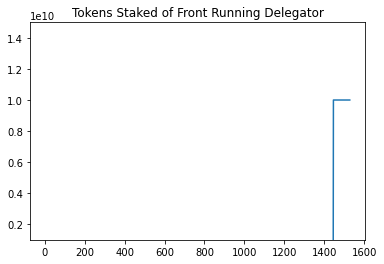

In [9]:
input_tokens_list = []
for i, values in delegator_values_df[1].items():
    if values.indexer_shares != {}:
        input_tokens_list.append(values.indexer_in_tokens['0x7ab4cf25330ed7277ac7ab59380b68eea68abb0e'])
    else:
        input_tokens_list.append(0)
plt.plot(delegator_values_df.index, input_tokens_list)
plt.title('Tokens Staked of Front Running Delegator');
plt.ylim(1000000000,15000000000);

Here we see quite a large difference between shares and tokens indicating there being quite a bit of GRT in the pool. 

Text(0.5, 1.0, 'Tokens Staked of Front Running Delegator')

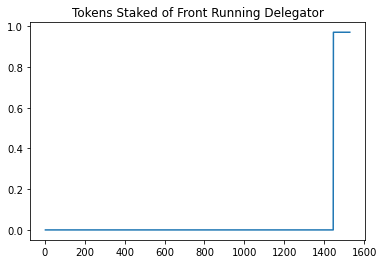

In [10]:
indexer_price_list = []
for i, values in delegator_values_df[1].items():
    if values.indexer_shares != {}:
        indexer_price_list.append(values.indexer_price['0x7ab4cf25330ed7277ac7ab59380b68eea68abb0e'])
    else:
        indexer_price_list.append(0)
plt.plot(delegator_values_df.index, indexer_price_list)
plt.title('Tokens Staked of Front Running Delegator')
#plt.ylim(250000,280000);

Here we see the price that the delegator gets is quite low when they delegate. 

In [11]:
for i, values in delegator_values_df[1].items():
    if values.indexer_locked_tokens != {}:
        print(values.indexer_locked_tokens)

{'0x7ab4cf25330ed7277ac7ab59380b68eea68abb0e': Decimal('10000251819.64464999999576474')}
{'0x7ab4cf25330ed7277ac7ab59380b68eea68abb0e': Decimal('10000251819.64464999999576474')}
{'0x7ab4cf25330ed7277ac7ab59380b68eea68abb0e': Decimal('10000251819.64464999999576474')}
{'0x7ab4cf25330ed7277ac7ab59380b68eea68abb0e': Decimal('10000251819.64464999999576474')}
{'0x7ab4cf25330ed7277ac7ab59380b68eea68abb0e': Decimal('10000251819.64464999999576474')}
{'0x7ab4cf25330ed7277ac7ab59380b68eea68abb0e': Decimal('10000251819.64464999999576474')}
{'0x7ab4cf25330ed7277ac7ab59380b68eea68abb0e': Decimal('10000251819.64464999999576474')}
{'0x7ab4cf25330ed7277ac7ab59380b68eea68abb0e': Decimal('10000251819.64464999999576474')}
{'0x7ab4cf25330ed7277ac7ab59380b68eea68abb0e': Decimal('10000251819.64464999999576474')}
{'0x7ab4cf25330ed7277ac7ab59380b68eea68abb0e': Decimal('10000251819.64464999999576474')}
{'0x7ab4cf25330ed7277ac7ab59380b68eea68abb0e': Decimal('10000251819.64464999999576474')}
{'0x7ab4cf25330ed7277

Text(0.5, 1.0, 'Front Running Delegator')

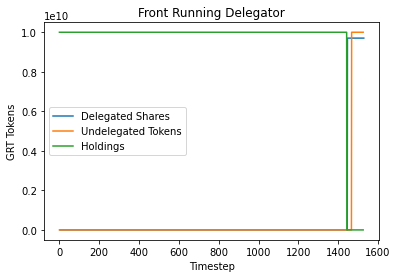

In [22]:
indexer_locked_list = []
shares_list = []
holdings_list = []
for i, values in delegator_values_df[1].items():
    # print(i)
    # print(values)
    # print(values.indexer_locked_tokens)
    if values.indexer_shares != {}:
        # print('got_shares ',i, ' values.indexer_shares ', values.indexer_shares)
        shares_list.append(values.indexer_shares['0x7ab4cf25330ed7277ac7ab59380b68eea68abb0e'])
    else:
        shares_list.append(0)
    if values.indexer_locked_tokens != {}:
        # print('got_locked tokens ',i, ' values.indexer_locked_tokens ', values.indexer_locked_tokens)
        indexer_locked_list.append(values.indexer_locked_tokens['0x7ab4cf25330ed7277ac7ab59380b68eea68abb0e'])
    else:
        indexer_locked_list.append(0)
    if values.holdings != {}:
        holdings_list.append(values.holdings)
    else:
        indexer_locked_list.append(0)
plt.plot(delegator_values_df.index, shares_list,indexer_locked_list)
plt.plot(holdings_list)
plt.legend(['Delegated Shares','Undelegated Tokens', 'Holdings']) 
plt.xlabel('Timestep')
plt.ylabel('GRT Tokens')
plt.title('Front Running Delegator')
# print(holdings_list)

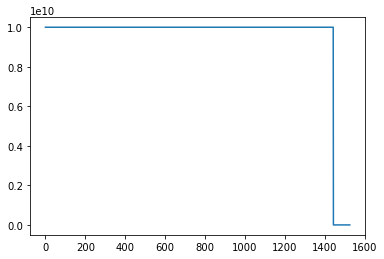

In [13]:
plt.plot(holdings_list)

Text(0.5, 1.0, 'Front Running Delegator')

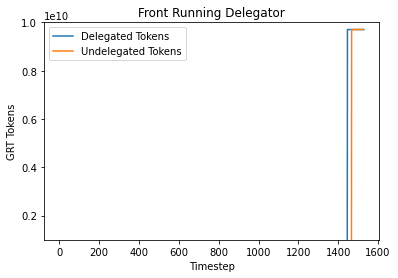

In [14]:
indexer_locked_list = []
shares_list = []
for i, values in delegator_values_df[1].items():
    # print(i)
    # print(values.indexer_shares)
    # print(values.indexer_locked_tokens)
    if values.indexer_shares != {}:
        # print('got_shares ',i)
        shares_list.append(values.indexer_shares['0x7ab4cf25330ed7277ac7ab59380b68eea68abb0e'])
    else:
        shares_list.append(0)
    if values.indexer_locked_tokens != {}:
        # print('got_locked tokens ',i)
        
        indexer_locked_list.append(values.indexer_shares['0x7ab4cf25330ed7277ac7ab59380b68eea68abb0e'])
    else:
        indexer_locked_list.append(0)
plt.plot(delegator_values_df.index, shares_list,indexer_locked_list)
plt.legend(['Delegated Tokens','Undelegated Tokens'])
plt.xlabel('Timestep')
plt.ylabel('GRT Tokens')
plt.ylim(999999999,10000000000)
plt.title('Front Running Delegator')

In [15]:
# # variables of the HeuristicAgent
# agent_inputs = HeuristicAgent.inputs
# agent_beliefs = HeuristicAgent.beliefs
# agent_states = HeuristicAgent.states
# agent_strategies = HeuristicAgent.strategies
# agent_plans = HeuristicAgent.plans
# agent_outputs = HeuristicAgent.outputs

# # create dataframe of agent actions
# agent_actions = df['agents']
# agent_df = {}
# timestep = 0
# for i in agent_actions:
#     for agent_id, actions in i.items():
#         if agent_id not in agent_df:
#             agent_df[agent_id] = {}
#     agent_df[agent_id][timestep] = actions
# agent_df = pd.DataFrame(agent_df)

# # obtain information on the agent
# agent_df['agent1_state'] = 0
# agent_df['agent1_inputs'] = 0
# agent_df['agent1_beliefs'] = 0
# agent_df['agent1_strategies'] = 0
# agent_df['agent1_plans'] = 0
# agent_df['agent1_outputs'] = 0

# for i, j in enumerate(agent_df[agent_id]):
#     agent_df['agent1_state'][i] = j.states
#     agent_df['agent1_inputs'][i] = j.inputs
#     agent_df['agent1_state'][i] = j.states
#     agent_df['agent1_strategies'][i] = j.strategies
#     agent_df['agent1_plans'][i] = j.plans
#     agent_df['agent1_outputs'][i] = j.outputs



In [16]:
# # analysis of agent
# for j in range(10):
#     for i in agent_df['agent1_state'][j]:
#         print(i)

In [17]:
# for j in range(10):
#     for i in agent_df['agent1_inputs'][j]:
#         print(i)

In [18]:
# for j in range(10):
#     for i in agent_df['agent1_states'][j]:
#         print(i)

In [19]:
# for j in range(10):
#     for i in agent_df['agent1_strategies'][j]:
#         print(i)

In [20]:
# for j in range(10):
#     for i in agent_df['agent1_plans'][j]:
#         print(i)

In [21]:
# for j in range(10):
#     for i in agent_df['agent1_outputs'][j]:
#         print(i)